# Chapter 19 分群

### K-Means 分群

In [5]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
iris = datasets.load_iris()
features = iris.data
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

In [7]:
cluster = KMeans(n_clusters=3, random_state=0, n_jobs=-1)
model = cluster.fit(features)

#### Notes: K-means
1. 先隨機產生k群聚的中心點。
2. 對每一個觀察計算：
    * 與k個中心點的距離。
    * 將觀察指定給最接近其中心點的群聚。
3. 中心點會被移動到預期群聚的平均值上。
4. 重複進行2, 3步驟

#### K-mean分群假設群聚呈凸形，且所有特徵尺度調成相等(標準化)，群聚是平衡的

In [8]:
# 檢視預測類型
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [9]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
new_observation = [[0.8, 0.8, 0.8, 0.8]]
model.predict(new_observation)

array([1])

In [11]:
# 檢視群聚中心
model.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

### 加速K-means

In [12]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MiniBatchKMeans
iris = datasets.load_iris()
features = iris.data
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

In [13]:
cluster = MiniBatchKMeans(n_clusters=3, random_state=0, batch_size=100) # batch_size 每次批次處理時隨機選取觀察的數目
model = cluster.fit(features_standardized)

### 以Meanshift分群

In [15]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MeanShift
iris = datasets.load_iris()
features = iris.data
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

In [17]:
cluster = MeanShift(n_jobs=-1) # 不用給群數
model = cluster.fit(features_standardized)

#### 有兩個參數：
1. bandwidth 設定kernel半徑，觀察以之判斷要轉移的方向。
2. 在預設的情境下，MeanShift會將所有的這些孤鳥指定給最接近的kernel，如果要將這些排除的話可以用cluster_all=False。

### 以DBSCAN分群(高密度分群)

In [18]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
iris = datasets.load_iris()
features = iris.data
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

In [19]:
cluster = DBSCAN(n_jobs=-1)
model = cluster.fit(features_standardized)

#### Notes: DBSCAN觀念
1. 隨機選遠取一個觀察$x_i$。
2. 若$x_i$有最少的鄰點，我們會將它歸屬到一個群聚中。
3. 在$x_i$的鄰點上遞迴執行步驟2，接著對鄰點的鄰點繼續做下去，這些就會被視為群聚的kernel觀察點。
4. 當步驟3執行完所有鄰近觀察點後，再隨機選一個點(from step 1)

#### DBSCAN參數

* eps：一觀察被劃為另一個觀察之鄰點的最大距離。<br>
* min_samples：與一觀察之距離小於eps的最小觀察數量，會讓該觀察被視為核心觀察點。<br>
* metric：eps所使用的距離指標，如minkowski或euclidean。

In [20]:
# -1為離群
model.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1, -1, -1,  1, -1, -1,  1, -1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1,
        1,  1,  1, -1, -1, -1, -1, -1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
       -1,  1,  1, -1,  1,  1, -1,  1,  1,  1, -1, -1, -1,  1,  1,  1, -1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1],
      dtype=int64)

### 以分層合併進行分群

#### hierarchy of clusters

In [23]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
iris = datasets.load_iris()
features = iris.data
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

In [24]:
cluster = AgglomerativeClustering(n_clusters=3)
model = cluster.fit(features_standardized)

#### Linkage參數：
* 合併群聚的變異(ward)
* 配對群聚中觀察的平均距離(average)
* 配對群聚中觀察的最大距離(complete)

#### Affinity參數：絕對linkage需用的距離指標(minkowski，euclidean)

In [25]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

# Chapter 20 類神經網路

### 類神經網路資料的預處理

In [27]:
from sklearn import preprocessing
import numpy as np
features = np.array([[-100.1, 3240.1], [-200.2, -234.1], [5000.5, 150.1], [6000.6, -125.1], [9000.9, -673.1]])
scaler = preprocessing.StandardScaler()
features_standardized = scaler.fit_transform(features)

In [32]:
print("Mean:", round(features_standardized[:,0].mean()))
print("Standatd deviation:", round(features_standardized[:,0].std()))

Mean: 0.0
Standatd deviation: 1.0


### 類神經網路設計

In [35]:
from keras import models
from keras import layers
network = models.Sequential()
network.add(layers.Dense(units=16, activation="relu", input_shape=(10, )))
network.add(layers.Dense(units=16, activation="relu"))
network.add(layers.Dense(units=1, activation="sigmoid"))
network.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

In [36]:
network.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                176       
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 465
Trainable params: 465
Non-trainable params: 0
_________________________________________________________________


#### 隱藏層的每一個工作：
1. 接收一些輸入。
2. 用參數值為每一輸入加總。
3. 將加權後的所有輸入加總，加上一些偏差。
4. 通常會再套用一些激發函式(activation)。
5. 將輸出傳給下一層上的單元。

#### Rectified linear unit，ReLU 
$f(z)=max(0, z)$

#### 常見的輸出層模式：

* 二元分類(Binary classfication)：一個帶有S型曲線激發函式的單元。
* 多類型分類(Multiclass classfication)：有K個單元(目標類型)與一個softmax activation。
* 迴歸(Regression)：一個不帶激發函式的單元。

#### 常見的loss function：

* 二元分類(Binary classfication)：二元交叉熵(Binary cross-entropy)。
* 多類型分類(Multiclass classfication)：類型交叉熵(Categorical cross-entropy)。
* 迴歸(Regression)：均方差(Mean square error)。

### 二元分類器之訓練

In [39]:
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
np.random.seed(0)
number_of_features = 1000
(data_train, target_train), (data_test, target_test) = imdb.load_data(num_words=number_of_features)

17465344/17464789 [==============================] - 2s 0us/step


In [42]:
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

In [51]:
features_train.shape

(25000, 1000)

In [48]:
network = models.Sequential()
network.add(layers.Dense(units=16, activation="relu", input_shape=(number_of_features,)))
network.add(layers.Dense(units=16, activation="relu"))
network.add(layers.Dense(units=1, activation="sigmoid"))
network.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])
history = network.fit(features_train,
                      target_train,
                      epochs=3,
                      verbose=1, # 0代表不列, 1代表有progress bar, 2 代表每一趟列出一行紀錄
                      batch_size=100,
                      validation_data=(features_test, target_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 2s 86us/step - loss: 0.4251 - accuracy: 0.8112 - val_loss: 0.3415 - val_accuracy: 0.8543
Epoch 2/3
25000/25000 [==============================] - 1s 46us/step - loss: 0.3243 - accuracy: 0.8630 - val_loss: 0.3344 - val_accuracy: 0.8577
Epoch 3/3
25000/25000 [==============================] - 1s 45us/step - loss: 0.3142 - accuracy: 0.8697 - val_loss: 0.3307 - val_accuracy: 0.8594


### 多類型分類器訓練

In [83]:
import numpy as np
from keras.datasets import reuters
from keras.utils.np_utils import to_categorical
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
np.random.seed(0)
number_of_features = 5000
data = reuters.load_data(num_words=number_of_features)
(X_train, y_train), (X_test, y_test) = data

In [84]:
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(X_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(X_test, mode="binary")
target_train = to_categorical(y_train)
target_test = to_categorical(y_test)

In [87]:
model = models.Sequential()
model.add(layers.Dense(units=100, activation="relu", input_shape=(number_of_features,)))
model.add(layers.Dense(units=100, activation="relu"))
model.add(layers.Dense(units=46, activation="softmax"))
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="rmsprop")
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 100)               500100    
_________________________________________________________________
dense_25 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_26 (Dense)             (None, 46)                4646      
Total params: 514,846
Trainable params: 514,846
Non-trainable params: 0
_________________________________________________________________


In [90]:
history = model.fit(features_train,
                      target_train,
                      epochs=3,
                      verbose=1,
                      batch_size=100,
                      validation_data=(features_test, target_test))

Train on 8982 samples, validate on 2246 samples
Epoch 1/3
8982/8982 [==============================] - 1s 90us/step - loss: 0.1954 - accuracy: 0.9496 - val_loss: 1.0753 - val_accuracy: 0.7983
Epoch 2/3
8982/8982 [==============================] - 1s 85us/step - loss: 0.1715 - accuracy: 0.9520 - val_loss: 1.0867 - val_accuracy: 0.7943
Epoch 3/3
8982/8982 [==============================] - 1s 85us/step - loss: 0.1608 - accuracy: 0.9523 - val_loss: 1.0932 - val_accuracy: 0.7974


### 迴歸器之訓練

In [92]:
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
np.random.seed(0)
# 模擬資料集無須標準化
features, target = make_regression(n_samples = 10000,
                                   n_features = 3,
                                   n_informative = 3,
                                   n_targets = 1,
                                   noise = 0.0,
                                   random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=0)

In [93]:
X_train.shape

(6700, 3)

In [94]:
model = models.Sequential()
model.add(layers.Dense(units=32, activation="relu", input_shape=(X_train.shape[1],)))
model.add(layers.Dense(units=32, activation="relu"))
# 加入不帶激發函式的全連結層
model.add(layers.Dense(units=1))
model.compile(loss="mse", metrics=["accuracy"], optimizer="RMSprop")
history = model.fit(X_train,
                    y_train,
                    epochs=10,
                    verbose=1,
                    batch_size=100,
                    validation_data=(X_test, y_test))

Train on 6700 samples, validate on 3300 samples
Epoch 1/10
6700/6700 [==============================] - 0s 43us/step - loss: 17383.1097 - accuracy: 0.0000e+00 - val_loss: 17801.4199 - val_accuracy: 0.0000e+00
Epoch 2/10
6700/6700 [==============================] - 0s 28us/step - loss: 16640.4910 - accuracy: 0.0000e+00 - val_loss: 16674.8511 - val_accuracy: 0.0000e+00
Epoch 3/10
6700/6700 [==============================] - 0s 28us/step - loss: 15163.3087 - accuracy: 0.0000e+00 - val_loss: 14728.0821 - val_accuracy: 0.0000e+00
Epoch 4/10
6700/6700 [==============================] - 0s 28us/step - loss: 12884.7934 - accuracy: 0.0000e+00 - val_loss: 11913.5058 - val_accuracy: 0.0000e+00
Epoch 5/10
6700/6700 [==============================] - 0s 28us/step - loss: 9769.4120 - accuracy: 0.0000e+00 - val_loss: 8386.3100 - val_accuracy: 0.0000e+00
Epoch 6/10
6700/6700 [==============================] - 0s 28us/step - loss: 6327.3955 - accuracy: 0.0000e+00 - val_loss: 4783.7153 - val_accuracy: 0

$$MSE=\frac{1}{n}\sum_{i=1}^{n}(\hat{y_i}-y_i)^2$$

### 預測

In [1]:
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
np.random.seed(0)
number_of_features = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=number_of_features)
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(X_train, mode="binary")
target_train = y_train
features_test = tokenizer.sequences_to_matrix(X_test, mode="binary")
target_test = y_test

Using TensorFlow backend.


In [2]:
X_test.shape

(25000,)

In [3]:
model = models.Sequential()
model.add(layers.Dense(units=16, activation="relu", input_shape=(number_of_features,)))
model.add(layers.Dense(units=16, activation="relu"))
model.add(layers.Dense(units=1, activation="sigmoid"))
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [4]:
history = model.fit(features_train,
                    target_train,
                    epochs=3,
                    verbose=1,
                    batch_size=100,
                    validation_data=(features_test, target_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 6s 224us/step - loss: 0.3361 - accuracy: 0.8628 - val_loss: 0.2807 - val_accuracy: 0.8884
Epoch 2/3
25000/25000 [==============================] - 5s 197us/step - loss: 0.2048 - accuracy: 0.9219 - val_loss: 0.3468 - val_accuracy: 0.8642
Epoch 3/3
25000/25000 [==============================] - 5s 196us/step - loss: 0.1660 - accuracy: 0.9375 - val_loss: 0.3754 - val_accuracy: 0.8603


In [7]:
predicted_target = model.predict(features_test)
predicted_target[0]

array([0.06130871], dtype=float32)

### 訓練歷程視覺化

In [8]:
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
import matplotlib.pyplot as plt
np.random.seed(0)
number_of_features = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=number_of_features)

In [10]:
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(X_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(X_test, mode="binary")
target_train = y_train; target_test = y_test

In [11]:
model = models.Sequential()
model.add(layers.Dense(units=16, activation="relu", input_shape=(number_of_features, )))
model.add(layers.Dense(units=16, activation="relu"))
model.add(layers.Dense(units=1, activation="sigmoid"))
model.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])
history = model.fit(features_train, target_train, epochs=15, verbose=1, batch_size=1024, validation_data=(features_test, target_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 4s 176us/step - loss: 0.5309 - accuracy: 0.7700 - val_loss: 0.4097 - val_accuracy: 0.8684
Epoch 2/15
25000/25000 [==============================] - 4s 155us/step - loss: 0.3278 - accuracy: 0.8958 - val_loss: 0.3225 - val_accuracy: 0.8844
Epoch 3/15
25000/25000 [==============================] - 4s 155us/step - loss: 0.2517 - accuracy: 0.9159 - val_loss: 0.3157 - val_accuracy: 0.8747
Epoch 4/15
25000/25000 [==============================] - 4s 154us/step - loss: 0.2066 - accuracy: 0.9302 - val_loss: 0.2829 - val_accuracy: 0.8881
Epoch 5/15
25000/25000 [==============================] - 4s 154us/step - loss: 0.1777 - accuracy: 0.9385 - val_loss: 0.3629 - val_accuracy: 0.8525
Epoch 6/15
25000/25000 [==============================] - 4s 154us/step - loss: 0.1573 - accuracy: 0.9466 - val_loss: 0.3092 - val_accuracy: 0.8768
Epoch 7/15
25000/25000 [==============================] - 4s 1

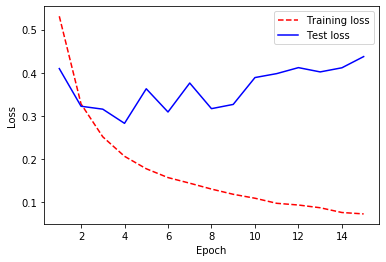

In [22]:
training_loss = history.history["loss"]
test_loss = history.history["val_loss"]
x = range(1, len(training_loss)+1)
plt.plot(x, training_loss, "r--")
plt.plot(x, test_loss, "b-")
plt.legend(["Training loss", "Test loss"])
plt.xlabel("Epoch"); plt.ylabel("Loss")
plt.show()

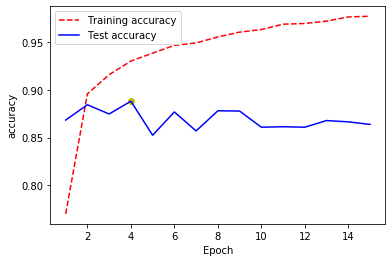

In [23]:
training_acc = history.history["accuracy"]
test_acc = history.history["val_accuracy"]
x = range(1, len(training_acc)+1)
plt.plot(x, training_acc, "r--")
plt.plot(x, test_acc, "b-")
plt.legend(["Training accuracy", "Test accuracy"])
plt.xlabel("Epoch"); plt.ylabel("accuracy")
plt.scatter(4, test_acc[3], c="y")
plt.show()

### 以權重正規化減少過度擬合

In [24]:
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from keras import regularizers
np.random.seed(0)
number_of_features = 1000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=number_of_features)
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(X_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(X_test, mode="binary")
target_train = y_train
target_test = y_test

In [27]:
model = models.Sequential()
model.add(layers.Dense(units=16, activation="relu", kernel_regularizer=regularizers.l2(0.01), input_shape=(number_of_features, )))
model.add(layers.Dense(units=16, activation="relu", kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dense(units=1, activation="sigmoid"))
model.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer="rmsprop")
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 16)                16016     
_________________________________________________________________
dense_10 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 17        
Total params: 16,305
Trainable params: 16,305
Non-trainable params: 0
_________________________________________________________________


In [29]:
history = model.fit(features_train, target_train, epochs=3, verbose=1, batch_size=128, validation_data=(features_test, target_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 1s 44us/step - loss: 0.6799 - accuracy: 0.7783 - val_loss: 0.5041 - val_accuracy: 0.8521
Epoch 2/3
25000/25000 [==============================] - 1s 34us/step - loss: 0.4716 - accuracy: 0.8545 - val_loss: 0.4511 - val_accuracy: 0.8579
Epoch 3/3
25000/25000 [==============================] - 1s 35us/step - loss: 0.4433 - accuracy: 0.8578 - val_loss: 0.4373 - val_accuracy: 0.8593


### EarlyStop 減少過度擬合

In [37]:
from keras.datasets import imdb
from keras import models, layers
from keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [38]:
np.random.seed(0)
number_of_features = 1000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=number_of_features)
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(X_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(X_test, mode="binary")
target_train = y_train
target_test = y_test

In [39]:
model = models.Sequential()
model.add(layers.Dense(units=16, activation="relu", input_shape=(number_of_features,)))
model.add(layers.Dense(units=16, activation="relu"))
model.add(layers.Dense(units=1, activation="sigmoid"))
model.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])
callbacks = [EarlyStopping(monitor="val_loss", patience=2),
             ModelCheckpoint(filepath="best_model.h5",
                             monitor="val_loss",
                             save_best_only=True)]

In [41]:
history = model.fit(features_train,
                    target_train,
                    epochs=20,
                    callbacks=callbacks,
                    verbose=1,
                    batch_size=100,
                    validation_data=(features_test, target_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 1s 52us/step - loss: 0.2994 - accuracy: 0.8755 - val_loss: 0.3325 - val_accuracy: 0.8591
Epoch 2/20
25000/25000 [==============================] - 1s 52us/step - loss: 0.2904 - accuracy: 0.8783 - val_loss: 0.3305 - val_accuracy: 0.8582
Epoch 3/20
25000/25000 [==============================] - 1s 47us/step - loss: 0.2793 - accuracy: 0.8834 - val_loss: 0.3389 - val_accuracy: 0.8569
Epoch 4/20
25000/25000 [==============================] - 1s 47us/step - loss: 0.2677 - accuracy: 0.8872 - val_loss: 0.3415 - val_accuracy: 0.8543


### 以Dropout減少過度擬合

In [53]:
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import layers, models
np.random.seed(0)
number_of_features = 1000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=number_of_features)
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(X_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(X_test, mode="binary")
target_train, target_test = y_train, y_test

In [54]:
features_test.shape

(25000, 1000)

In [58]:
model = models.Sequential()
# 輸入0.2, 隱藏0.5
model.add(layers.Dropout(0.2, input_shape=(number_of_features, )))
model.add(layers.Dense(units=16, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(units=16, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(units=1, activation="sigmoid"))
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_13 (Dropout)         (None, 1000)              0         
_________________________________________________________________
dense_31 (Dense)             (None, 16)                16016     
_________________________________________________________________
dropout_14 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_32 (Dense)             (None, 16)                272       
_________________________________________________________________
dropout_15 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 17        
Total params: 16,305
Trainable params: 16,305
Non-trainable params: 0
_________________________________________________

In [59]:
model.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer="rmsprop")
history = model.fit(features_train,
                    target_train,
                    epochs=3,
                    verbose=1,
                    batch_size=100,
                    validation_data=(features_test, target_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 2s 86us/step - loss: 0.6433 - accuracy: 0.6229 - val_loss: 0.5062 - val_accuracy: 0.8223
Epoch 2/3
25000/25000 [==============================] - 2s 76us/step - loss: 0.5109 - accuracy: 0.7634 - val_loss: 0.3758 - val_accuracy: 0.8507
Epoch 3/3
25000/25000 [==============================] - 2s 73us/step - loss: 0.4532 - accuracy: 0.8035 - val_loss: 0.3476 - val_accuracy: 0.8575


### ModelCheckpoint

In [60]:
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models, layers
from keras.callbacks import ModelCheckpoint
np.random.seed(0)
number_of_features = 1000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=number_of_features)
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(X_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(X_test, mode="binary")
target_train, target_test = y_train, y_test

In [61]:
model = models.Sequential()
model.add(layers.Dense(units=16, activation="relu", input_shape=(number_of_features,)))
model.add(layers.Dense(units=16, activation="relu"))
model.add(layers.Dense(units=1, activation="sigmoid"))
model.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer="rmsprop")
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 16)                16016     
_________________________________________________________________
dense_35 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_36 (Dense)             (None, 1)                 17        
Total params: 16,305
Trainable params: 16,305
Non-trainable params: 0
_________________________________________________________________


In [64]:
checkpoint = [ModelCheckpoint(filepath='models.hdf5')]
history = model.fit(features_train,
                    target_train,
                    epochs=3,
                    callbacks=checkpoint,
                    verbose=1,
                    batch_size=100,
                    validation_data=(features_test, target_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 2s 78us/step - loss: 0.3060 - accuracy: 0.8733 - val_loss: 0.3286 - val_accuracy: 0.8595
Epoch 2/3
25000/25000 [==============================] - 2s 75us/step - loss: 0.2981 - accuracy: 0.8760 - val_loss: 0.3329 - val_accuracy: 0.8584
Epoch 3/3
25000/25000 [==============================] - 2s 81us/step - loss: 0.2864 - accuracy: 0.8811 - val_loss: 0.3310 - val_accuracy: 0.8573


#### tricks: filepath="model_{epoch:02d}_ {val_loss:.2f}.hdf5}

### K次交叉驗證類神經網路

In [68]:
import numpy as np
from keras import models, layers
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
np.random.seed(0)
number_of_features = 100
features, target = make_classification(n_samples = 10000,
                                       n_features = number_of_features,
                                       n_informative = 3,
                                       n_redundant = 2,
                                       weights= [.5, .5],
                                       random_state= 0)

In [69]:
def create_network():
    model = models.Sequential()
    model.add(layers.Dense(units=16, activation="relu", input_shape=(number_of_features,)))
    model.add(layers.Dense(units=16, activation="relu"))
    model.add(layers.Dense(units=1, activation="sigmoid"))

    model.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer="rmsprop")
    return model

In [72]:
neural_network = KerasClassifier(build_fn=create_network,
                                 epochs=10,
                                 batch_size=100,
                                 verbose=0)
cross_val_score(neural_network, features, target, cv=3)

array([0.90731853, 0.90729076, 0.8988899 ])

### 類神經網路的校調

In [1]:
import numpy as np
from keras import layers, models
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification

Using TensorFlow backend.


In [2]:
number_of_features = 100
features, target = make_classification(n_samples = 10000,
                                       n_features = number_of_features,
                                       n_informative = 3,
                                       n_redundant = 2,
                                       weights= [.5, .5],
                                       random_state= 0)

In [3]:
def create_network(optimizer="rmsprop"):
    model = models.Sequential()
    model.add(layers.Dense(units=16, activation="relu", input_shape=(number_of_features,)))
    model.add(layers.Dense(units=16, activation="relu"))
    model.add(layers.Dense(units=1, activation="sigmoid"))
    model.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    return model

In [4]:
# 包裝keras 模型給 scikit-learn用
neural_network = KerasClassifier(build_fn=create_network, verbose=0)
epochs = [5, 10]
batchs = [5, 10, 100]
optimizers = ["rmsprop", "adam"]
hyperparameters = dict(optimizer=optimizers, epochs=epochs, batch_size=batchs)

In [5]:
grid = GridSearchCV(estimator=neural_network, param_grid=hyperparameters, cv=3)
grid_result = grid.fit(features, target)

In [6]:
# 檢視最佳的超參數
grid_result.best_params_

{'batch_size': 5, 'epochs': 10, 'optimizer': 'adam'}

### 類神經網路視覺化

In [1]:
# look up keras location
import keras
keras.__file__

Using TensorFlow backend.


'C:\\Users\\sychen\\Anaconda3\\envs\\tensorflow-gpu\\lib\\site-packages\\keras\\__init__.py'

In [2]:
from keras import models, layers
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

In [3]:
model = models.Sequential()
model.add(layers.Dense(units=16, activation="relu", input_shape=(10,)))
model.add(layers.Dense(units=16, activation="relu"))
model.add(layers.Dense(units=1, activation="sigmoid"))

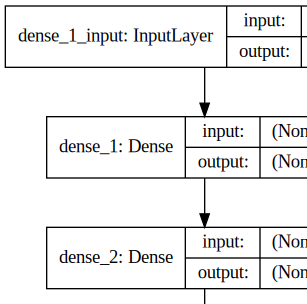

In [4]:
SVG(model_to_dot(model, show_shapes=True).create(prog="dot", format="svg"))

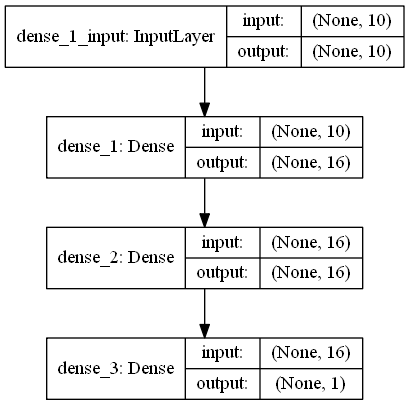

In [5]:
# 存擋
plot_model(model, show_shapes=True, to_file="model.png")

### 影像分類-CNN

In [27]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

In [9]:
# 設定色彩頻道優先
K.set_image_data_format("channels_first")

In [23]:
np.random.seed(0)
channels = 1
height = 28
width = 28
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape 主要是加了一個channel
X_train = X_train.reshape(X_train.shape[0], channels, height, width)
X_test = X_test.reshape(X_test.shape[0], channels, height, width)
# scale
features_train = X_train / 255
features_test = X_test / 255

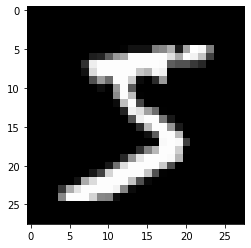

In [19]:
# plot 一張圖看看import matplotlib.pyplot as plt
first_image = X_train[0]
first_image = np.array(first_image, dtype='float')
pixels = first_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

In [28]:
# one-hot
target_train = np_utils.to_categorical(y_train)
target_test = np_utils.to_categorical(y_test)
number_of_classes = target_test.shape[1]

In [30]:
model = models.Sequential()
model.add(Conv2D(filters=64, kernel_size=(5, 5), input_shape=(channels, width, height), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(number_of_classes, activation="softmax"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 24, 24)        1664      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 12, 12)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64, 12, 12)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [31]:
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="rmsprop")
history = model.fit(features_train, target_train, verbose=1, epochs=3, batch_size=1024, validation_data=(features_test, target_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 10s 167us/step - loss: 0.6031 - accuracy: 0.8137 - val_loss: 0.2052 - val_accuracy: 0.9378
Epoch 2/3
60000/60000 [==============================] - 3s 58us/step - loss: 0.1934 - accuracy: 0.9441 - val_loss: 0.1013 - val_accuracy: 0.9693
Epoch 3/3
60000/60000 [==============================] - 3s 58us/step - loss: 0.1204 - accuracy: 0.9649 - val_loss: 0.0624 - val_accuracy: 0.9803


### 以影像增強改善效能

In [36]:
from keras.preprocessing.image import ImageDataGenerator
# 產生影像增強
augmentation = ImageDataGenerator(
    featurewise_center=True, # ZCA白化+標準化
    zoom_range=0.3, # 隨機放大影像
    width_shift_range=.2, # 隨機移動影像
    horizontal_flip=True, # 隨機翻轉影像
    rotation_range=90 #隨機旋轉
)
# 處理raw/images目錄下影像
augment_images = augmentation.flow_from_directory(
    "data/images/raw/images",
    batch_size=32,
    class_mode="binary",
    save_to_dir="processed/images")

Found 12665 images belonging to 2 classes.


#### 因為augment_images是一個產生器，在訓練時要用fit_generator

In [ ]:
model.fit_generator(
    augment_images,
    steps_per_epoch=2000,
    epochs=5,
    validation_data=augment_images_test,
    validation_steps=800)

### 文本分類 - LSTM

In [57]:
import numpy as np
from keras import models, layers
from keras.datasets import imdb
from keras.preprocessing import sequence
np.random.seed(0)
number_of_features = 1000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=number_of_features)
target_train, target_test = y_train, y_test

In [52]:
X_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 2,
 2,
 65,
 458,
 2,
 66,
 2,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 2,
 2,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2,
 19,
 14,
 22,
 4,
 2,
 2,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 2,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2,
 2,
 16,
 480,
 66,
 2,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 2,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 2,
 15,
 256,
 4,
 2,
 7,
 2,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 2,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2,
 56,
 26,
 141,
 6,
 194,
 2,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 2,
 18,
 51,
 36,
 28,
 224,
 92,
 25,
 104,
 4,
 226,
 65,
 16,
 3

In [53]:
# 使用填充/截斷讓每個觀察有400個特徵
features_train = sequence.pad_sequences(X_train, maxlen=400)
features_test = sequence.pad_sequences(X_test, maxlen=400)
features_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [55]:
model = models.Sequential()
model.add(layers.Embedding(input_dim=number_of_features, output_dim=128))
model.add(layers.LSTM(units=128))
model.add(layers.Dense(units=1, activation="sigmoid"))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 128)         128000    
_________________________________________________________________
lstm_4 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 129       
Total params: 259,713
Trainable params: 259,713
Non-trainable params: 0
_________________________________________________________________


In [60]:
model.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer="Adam")
history = model.fit(
    features_train,
    target_train,
    epochs=3,
    batch_size=64,
    verbose=1,
    validation_data=(features_test, target_test))

C:\Users\sychen\Anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 191s 8ms/step - loss: 0.3994 - accuracy: 0.8258 - val_loss: 0.3774 - val_accuracy: 0.8355
Epoch 2/3
25000/25000 [==============================] - 196s 8ms/step - loss: 0.4037 - accuracy: 0.8182 - val_loss: 0.3529 - val_accuracy: 0.8515
Epoch 3/3
25000/25000 [==============================] - 190s 8ms/step - loss: 0.3567 - accuracy: 0.8474 - val_loss: 0.4035 - val_accuracy: 0.8266
